<a href="https://colab.research.google.com/github/deelilah/HR-Promotion/blob/main/TM_Assessment_with_MTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!-- PROJECT LOGO -->
<br />
<p align="center">
  <a href="https://moringaschool">
    <img src="https://user-images.githubusercontent.com/14905480/89539811-e57f1080-d804-11ea-892e-ca6888a2f60b.png" alt="Logo" width="80" height="80">
  </a>

  <h2 align="center">TM Assessment Presentation</h2>


  <p align="center">
    Multivariate Analysis Technique
    <br/> Compiled by Rose Delilah Gesicho
    <br />
    <br />
    <br />
    <a href="https://drive.google.com/file/d/1QchPIownzb10MlWCR40nCOHDSVCCzfhJ/view?usp=sharing">View Dataset</a>
    •
    <a href="https://github.com/deelilah/HR-Promotion">Github</a>
    •
    <a href="https://moringaschool.com">Moringa School</a>
  </p>
</p>

#MULTIVARIATE ANALYSIS TECHNIQUE





## Assessment Question

<font color="green">Implementation</font>

### 1. Defining the Question

 a) Specifying the Question

This is the analysis of factors that contribute to an individual getting promoted.It will focus on multivariate analysis.


#### b) Defining the Metric for Success

The analysis will focus on multivariate analysis techniques.

#### c) Understanding the context 

A large MNC has 9 broad verticals across the organization. One of the problems is identifying the right people for promotion (only for manager position and below) and preparing them in time. The final promotions are only announced after the evaluation and this leads to delay in transition to new roles. Hence, the company needs help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.






#### d) Recording the Experimental Design


Below is the expected flow of the work:

- Data Cleaning and Preparation
    - Load libraries and dataset
    - Deal with missing values
    - Deal with duplicated records
- Perform EDA
    - Univariate Analysis
    - Bivariate Analysis
    -Multivariate Analysis

#### e) Data relevance / Appropriateness of Data


   
*  ememployee_id: Unique ID for employee

* department: Department of employee

* region: Region of employment (unordered)

* education: Education Level

* gender: Gender of Employee

* recruitment_channel: Channel of recruitment for employee

* no of trainings: no of other trainings completed in previous year on soft skills, technical skills etc.

* age: Age of Employee

* previous year rating: Employee Rating for the previous year

* length of service: Length of service in years

* awards_ won: if awards won during previous year then 1 else 0

* avg training score: Average score in current training evaluations

* is_promoted: (Target: 1=Promoted, 0=Not Promoted) Recommended for promotion



Importing libraries

In [13]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from six import StringIO
from IPython.display import Image
import pydotplus

In [14]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [15]:
df=pd.read_csv('/content/gdrive/MyDrive/TM Position Assessment - Rose Delilah/Dataset on HR Promotion/train.csv')
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


###Data Understanding

In [16]:
# number of records in the dataset,unique values and the summary
df.shape

(54808, 13)

In [17]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [18]:
df.department.unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [19]:
df.education.unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [21]:
#convert datatype correctly from integer to string
df['employee_id']=df['employee_id'].astype(int).astype('str')


In [22]:
#convert datatype correctly from integer to category
df['is_promoted']=df['is_promoted'].astype(int).astype('category')

In [23]:
#convert datatype correctly from integer to category
df['awards_won?']=df['awards_won?'].astype(int).astype('category')




In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           54808 non-null  object  
 1   department            54808 non-null  object  
 2   region                54808 non-null  object  
 3   education             52399 non-null  object  
 4   gender                54808 non-null  object  
 5   recruitment_channel   54808 non-null  object  
 6   no_of_trainings       54808 non-null  int64   
 7   age                   54808 non-null  int64   
 8   previous_year_rating  50684 non-null  float64 
 9   length_of_service     54808 non-null  int64   
 10  awards_won?           54808 non-null  category
 11  avg_training_score    54808 non-null  int64   
 12  is_promoted           54808 non-null  category
dtypes: category(2), float64(1), int64(4), object(6)
memory usage: 4.7+ MB


In [25]:
# Checking for null values

df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [26]:
#impute with mode for the missing values
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].mode()[0])


In [27]:
# Checking duplicate values

df.duplicated().any()

False

In [28]:
#Drop columns not in use
df_new=df.drop('employee_id', axis = 1)
df_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


Check for outliers

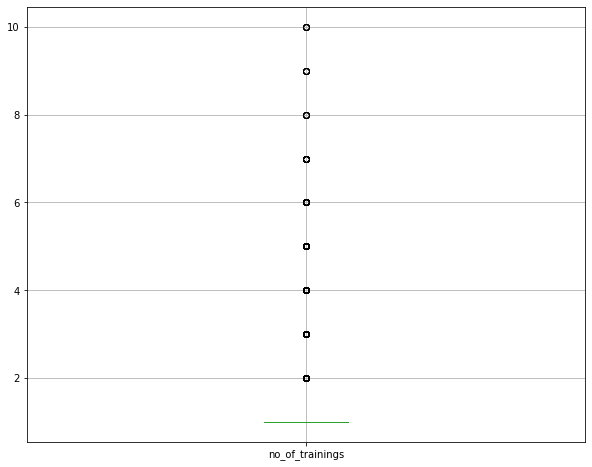

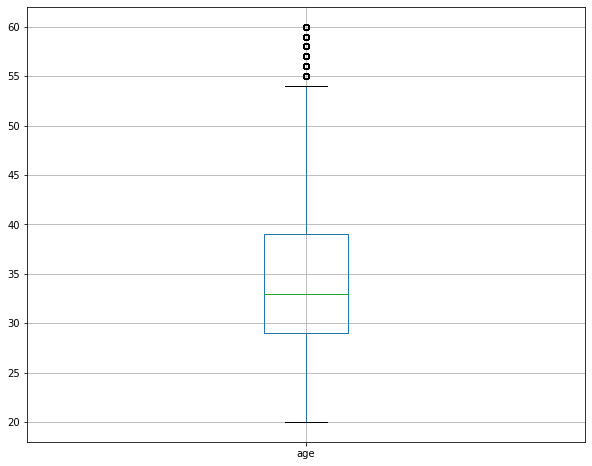

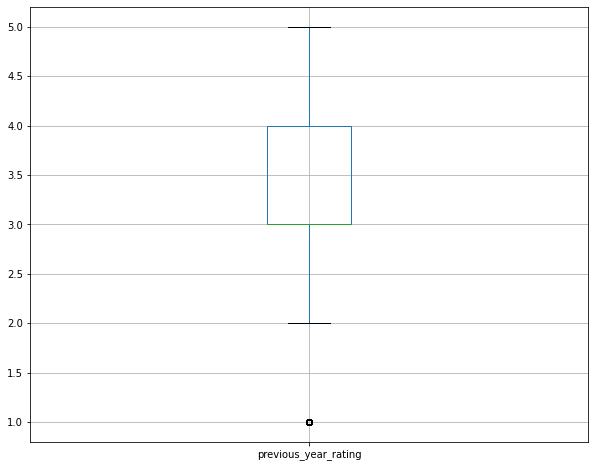

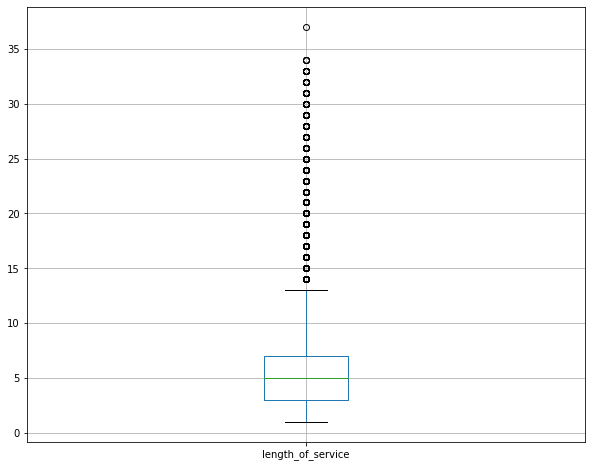

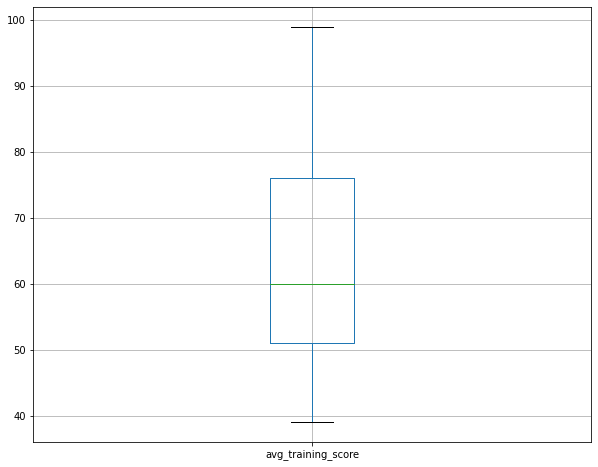

In [29]:
num_cols = df_new.select_dtypes('number').columns

for col in num_cols:
  plt.figure(figsize = (10, 8))
  df.boxplot([col])

There is presence of outliers for variables age,length of service and no of trainings.The outliers are significant as they are a representation of real world situation

#Exploratory Data Analysis


###Univariate Analysis


In [30]:
# measures of central tendency
for i in ['avg_training_score', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service']:
  print(f"For column {i}")
  print("Mean: ", df_new[i].mean())
  print("Mode: ", df_new[i].mode())
  print("Median: ", df_new[i].median())
  print("===========================================")

For column avg_training_score
Mean:  63.38675010947307
Mode:  0    50
dtype: int64
Median:  60.0
For column no_of_trainings
Mean:  1.253010509414684
Mode:  0    1
dtype: int64
Median:  1.0
For column age
Mean:  34.80391548679025
Mode:  0    30
dtype: int64
Median:  33.0
For column previous_year_rating
Mean:  3.3044810976499783
Mode:  0    3.0
dtype: float64
Median:  3.0
For column length_of_service
Mean:  5.865512333965844
Mode:  0    3
dtype: int64
Median:  5.0


In [31]:
# measures of dispersion

for x in ['avg_training_score', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service']:
  print(f"For column {x}")
  print("Skewness: ", df_new[x].skew())
  print("Kurtosis: ", df_new[x].kurt())
  print("Variance: ", df_new[x].var())
  print("Standard Deviation: ", df[x].std())
  print("=" * 40)

For column avg_training_score
Skewness:  0.45190808551707995
Kurtosis:  -1.049649301934108
Variance:  178.798603425308
Standard Deviation:  13.371559498626478
For column no_of_trainings
Skewness:  3.445433937567454
Kurtosis:  18.74008184650997
Variance:  0.3712026432013709
Standard Deviation:  0.609264017648647
For column age
Skewness:  1.0074317710382241
Kurtosis:  0.7923533691940756
Variance:  58.67819219692497
Standard Deviation:  7.660169201585887
For column previous_year_rating
Skewness:  -0.2608580288123413
Kurtosis:  -0.5928105773788475
Variance:  1.4756658719220315
Standard Deviation:  1.2147698843493082
For column length_of_service
Skewness:  1.738061458740809
Kurtosis:  4.414031376098643
Variance:  18.19102836159372
Standard Deviation:  4.2650941796862725


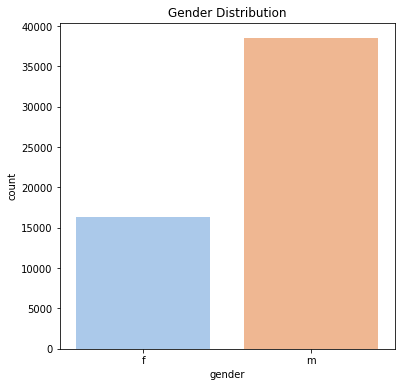

In [32]:
# Value counts of gender in the dataset

plt.figure(figsize=(6,6))
sns.countplot(x='gender', data=df_new, palette='pastel')
plt.title('Gender Distribution')
plt.show()

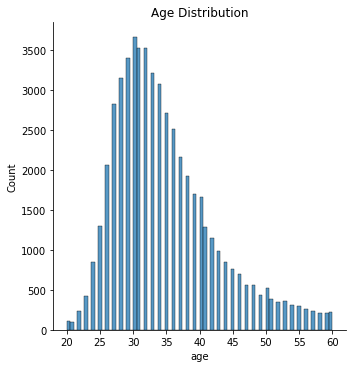

In [33]:
# Value counts of age in the dataset

sns.displot(data=df_new, x='age', kind='hist', palette='Set2')
plt.title('Age Distribution')
plt.show()

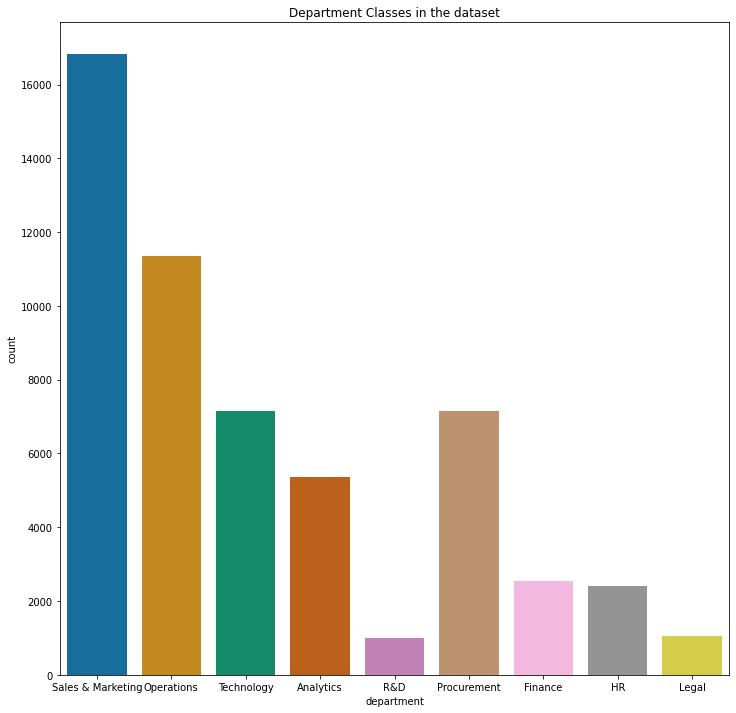

In [34]:
# Department classes in the dataset

plt.figure(figsize=(12, 12))
sns.countplot(x='department', data=df_new, palette='colorblind')
plt.title('Department Classes in the dataset')
plt.show()

The department with the most employees is Sales and Marketing,Operations and Procurement

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


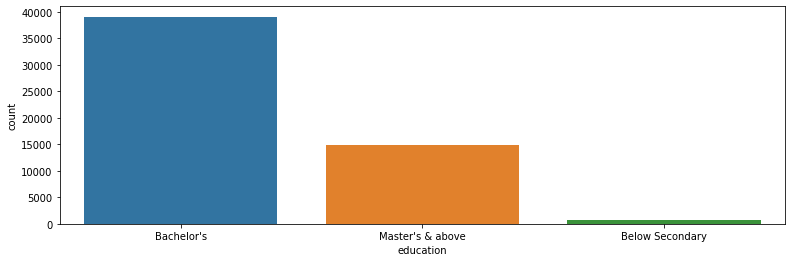

In [35]:
#Checking the highest level of education
plt.figure(figsize=(13, 4))
sns.countplot(df_new.education,order = df_new.education.value_counts().index);

Most employees hold a bachelors and very few have no higher learning education from Secondary

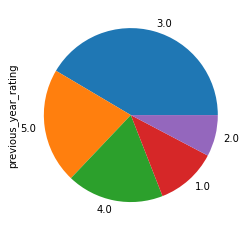

In [36]:
#Pie plot of the ratings given 

df_new['previous_year_rating'].value_counts().head(10).plot.pie()

# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

###Bivariate Analysis

<Figure size 864x720 with 0 Axes>

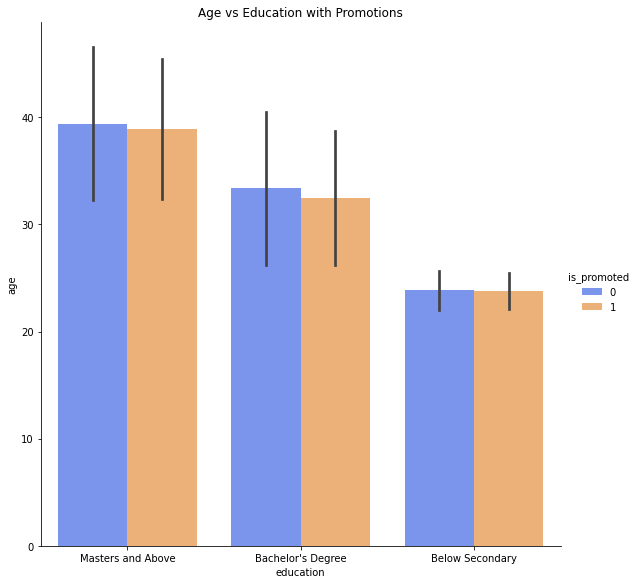

In [37]:
# Relationship between Education, age and Promotions
plt.figure(figsize=(12,10))
sns.catplot(x='education', y='age', hue='is_promoted', data=df_new, kind='bar',
            palette='bright', ci='sd', alpha=.6, height=8)
plt.xticks(ticks=[0,1,2], labels=['Masters and Above', "Bachelor's Degree", "Below Secondary"])
plt.title("Age vs Education with Promotions")
plt.show()

<Figure size 576x576 with 0 Axes>

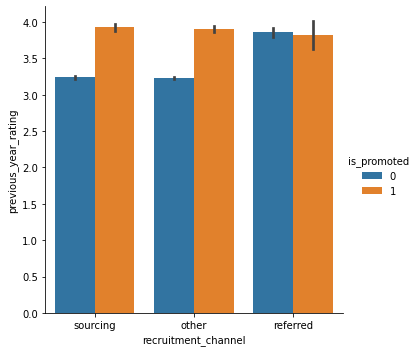

In [38]:
# Relationship between Recruitment channels, Previous year ratings and Promotions

plt.figure(figsize=(8,8))
sns.catplot(x='recruitment_channel', y='previous_year_rating', data=df_new, hue='is_promoted', kind='bar')
plt.show()

In [39]:
df_new.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


<Figure size 576x576 with 0 Axes>

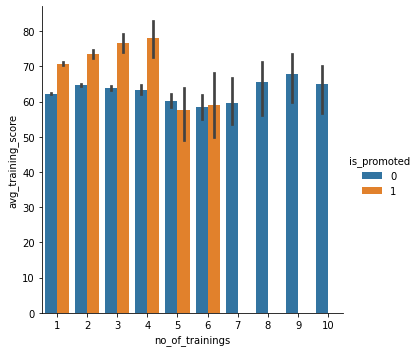

In [40]:
# Relationship between No of training , avg training score and Promotions

plt.figure(figsize=(8,8))
sns.catplot(x='no_of_trainings', y='avg_training_score', data=df_new, hue='is_promoted', kind='bar')
plt.show()

There seems to be a factor that no of training does contribute to someone being promoted

<Figure size 576x576 with 0 Axes>

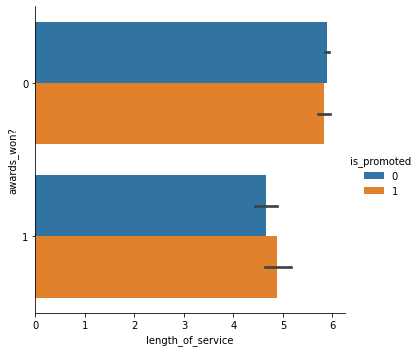

In [41]:
plt.figure(figsize=(8,8))
sns.catplot(x='length_of_service', y='awards_won?', data=df_new, hue='is_promoted', kind='bar')
plt.show()

Length of service has an impact on someone being promoted 

##Multivariate Analysis

Multivariate analysis refers to all statistical techniques that simultaneously analyze
multiple measurements on individuals or objects under investigation. Thus, any simultaneous analysis of more than
two variables can be loosely considered multivariate analysis.


In [42]:
# # one-hot encoding of categorical variables,curse of dimentionality
# df1 = pd.get_dummies(df_new)
# df1.head()

In [43]:
#Used label encoding to encode all categorical data
from sklearn.preprocessing import StandardScaler, LabelEncoder

df1=df_new.apply(LabelEncoder().fit_transform)
df1.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,7,31,2,0,2,0,15,4,7,0,10,0
1,4,14,0,1,0,0,10,4,3,0,21,0
2,7,10,0,1,2,0,14,2,6,0,11,0
3,7,15,0,1,0,1,19,0,9,0,11,0
4,8,18,0,1,0,0,25,2,1,0,34,0


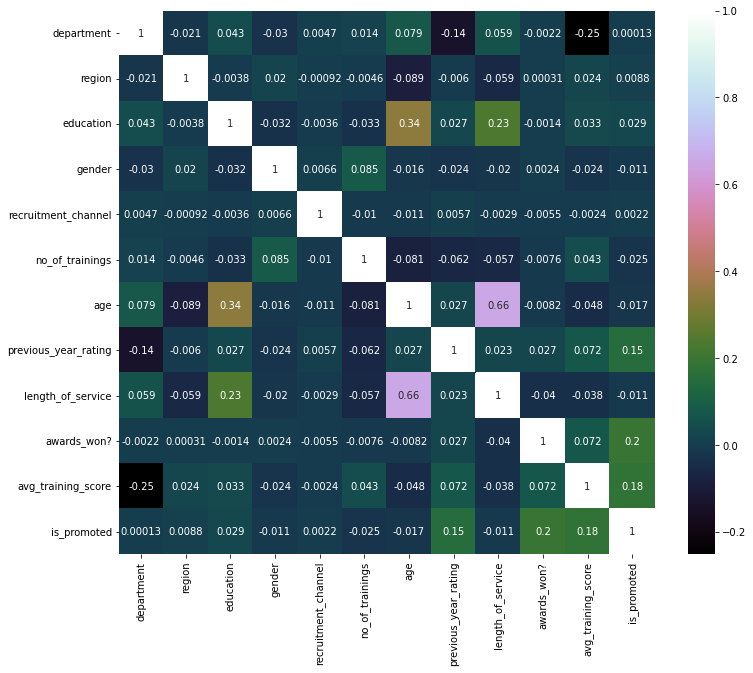

In [44]:
# A heatmap inspecting correlations between variables in the dataset

plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(), cmap='cubehelix', annot=True)
plt.show()

In [45]:
df1.shape

(54808, 12)

In [46]:
# # Separating features and target variables

X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [47]:

X.shape


(54808, 11)

In [48]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Features,VIF
6,age,8.09
8,length_of_service,4.06
7,previous_year_rating,3.92
0,department,3.89
10,avg_training_score,3.67
1,region,3.55
3,gender,3.04
4,recruitment_channel,1.73
2,education,1.58
5,no_of_trainings,1.19


Age and length of service have high multicollinearity. I wont drop the variable yet as I want to identify of what importance are they.

VIF > 5 symbolises high multicollinearity





####Discriminant Analysis

In [49]:
#standardize my data before using LDA so that it has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [50]:
# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()

lda_= lda.fit(X,y)
lda_feat = lda_.transform(X)

# Display the coeficients of the reducted columns
lda_.coef_

array([[ 1.01926230e-01,  2.03654144e-03,  1.11502696e-01,
         4.54802797e-03,  8.01500870e-03, -1.56716211e-01,
        -1.72961074e-02,  4.64520363e-01,  1.01821341e-02,
         4.70494428e+00,  5.09838017e-02]])

In [51]:
lda.explained_variance_ratio_

array([1.])

measure the discrepancy between a model and actual data, this is definitely an issue due to generalization

In [52]:
# Matching the coeeficients to their variables
df2= pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
df2.sort_values(0, ascending=False)

,0
awards_won?,4.704944
previous_year_rating,0.464520
education,0.111503
department,0.101926
avg_training_score,0.050984
length_of_service,0.010182
recruitment_channel,0.008015
gender,0.004548
region,0.002037
age,-0.017296


##Insights and Recommendations




#Challenge the solution

From the selection of the multivariate technique used:
LDA was adopted due to the type of data we are addressing. This is a supervised ML challenge where we have our target variable as a category. 
The aim of using LDA was for it to perform feature reduction from our 13 features to identify which one contributes more to our target variable.

We didnt have high correlation within our independent variables.
From the LDA we have features highly contributing to ones promotion under awards_won,previous_year_rating,education,department,avg_training_score,length_of_service

We can also try other approaches like Random Forest or Regularization techniques to compare feature selected.

PCA (To check how it performs vs LDA )


In [53]:
#calculating the covariant matrix
mean_vec = np.mean(X_scaled, axis=0)
cov_mat = (X_scaled - mean_vec).T.dot((X_scaled - mean_vec)) / (X_scaled.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)


Covariance matrix 
[[ 1.00001825e+00 -2.05928733e-02  4.34414904e-02 -3.01089926e-02
   4.73226294e-03  1.41519617e-02  7.91635243e-02 -1.35563720e-01
   5.90573727e-02 -2.15114673e-03 -2.51630623e-01]
 [-2.05928733e-02  1.00001825e+00 -3.81513006e-03  1.97299442e-02
  -9.19665540e-04 -4.59054386e-03 -8.89200446e-02 -5.97670453e-03
  -5.89396798e-02  3.07280636e-04  2.35722397e-02]
 [ 4.34414904e-02 -3.81513006e-03  1.00001825e+00 -3.23686920e-02
  -3.56393376e-03 -3.34692943e-02  3.39972435e-01  2.73931279e-02
   2.33689346e-01 -1.40870736e-03  3.27880910e-02]
 [-3.01089926e-02  1.97299442e-02 -3.23686920e-02  1.00001825e+00
   6.56736128e-03  8.45027462e-02 -1.62934735e-02 -2.40245138e-02
  -1.96816414e-02  2.38153165e-03 -2.44946043e-02]
 [ 4.73226294e-03 -9.19665540e-04 -3.56393376e-03  6.56736128e-03
   1.00001825e+00 -1.04053113e-02 -1.14005514e-02  5.73082042e-03
  -2.89695853e-03 -5.51045697e-03 -2.41592476e-03]
 [ 1.41519617e-02 -4.59054386e-03 -3.34692943e-02  8.45027462e-02


In [54]:
print('NumPy covariance matrix: \n%s' %np.cov(X_scaled.T))


NumPy covariance matrix: 
[[ 1.00001825e+00 -2.05928733e-02  4.34414904e-02 -3.01089926e-02
   4.73226294e-03  1.41519617e-02  7.91635243e-02 -1.35563720e-01
   5.90573727e-02 -2.15114673e-03 -2.51630623e-01]
 [-2.05928733e-02  1.00001825e+00 -3.81513006e-03  1.97299442e-02
  -9.19665540e-04 -4.59054386e-03 -8.89200446e-02 -5.97670453e-03
  -5.89396798e-02  3.07280636e-04  2.35722397e-02]
 [ 4.34414904e-02 -3.81513006e-03  1.00001825e+00 -3.23686920e-02
  -3.56393376e-03 -3.34692943e-02  3.39972435e-01  2.73931279e-02
   2.33689346e-01 -1.40870736e-03  3.27880910e-02]
 [-3.01089926e-02  1.97299442e-02 -3.23686920e-02  1.00001825e+00
   6.56736128e-03  8.45027462e-02 -1.62934735e-02 -2.40245138e-02
  -1.96816414e-02  2.38153165e-03 -2.44946043e-02]
 [ 4.73226294e-03 -9.19665540e-04 -3.56393376e-03  6.56736128e-03
   1.00001825e+00 -1.04053113e-02 -1.14005514e-02  5.73082042e-03
  -2.89695853e-03 -5.51045697e-03 -2.41592476e-03]
 [ 1.41519617e-02 -4.59054386e-03 -3.34692943e-02  8.450274

Text(0.5, 1.0, 'Correlation between different features')

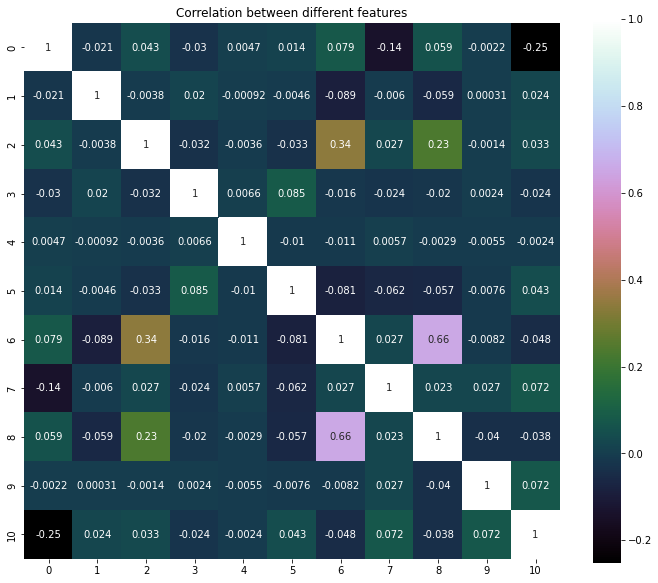

In [55]:
plt.figure(figsize=(12,10))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different features')

In [56]:
#calculating Eigen Values
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 1.39739349e-01 -1.28638303e-02 -6.11770557e-01  6.56523804e-01
  -1.55484966e-01  2.68481162e-01  1.05185127e-01 -1.01157557e-02
   1.86375369e-01 -1.78467779e-01 -3.17843158e-02]
 [-1.10856237e-01  3.75073778e-02  4.42803218e-02 -6.39210965e-05
   2.15500542e-01  1.29855457e-01 -3.39332947e-02  4.20787785e-03
  -1.46512535e-01 -2.44053056e-01 -9.15883958e-01]
 [ 4.09534614e-01 -1.38919369e-01  1.32544368e-01 -2.51537174e-01
  -7.86965257e-01  1.33746517e-01 -9.10560093e-02 -1.84456973e-01
   5.90423142e-02 -1.09384319e-01 -1.92807952e-01]
 [-5.63100440e-02 -1.27389424e-02 -6.07543215e-02  1.55307823e-01
  -2.10674538e-01 -2.44562909e-01 -6.28369812e-01  6.35274722e-01
  -2.35864011e-01 -1.02465940e-01  1.03354117e-02]
 [-9.16723258e-03  9.31988139e-03 -1.09103638e-02 -2.21393994e-02
   2.87214621e-02  1.49853950e-02  7.97187493e-02 -2.45716159e-01
  -6.14664167e-01 -6.86475731e-01  2.87015594e-01]
 [-1.19767042e-01  2.57748854e-02 -8.99340824e-02 -1.50726393e-01
   1.

In [57]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.8991912674208613
1.3249883752933806
1.0877460113707318
1.0106117851873309
1.0003560531009104
0.9960519712825471
0.9595845340806951
0.8840215599520844
0.8027042238228098
0.705025748147503
0.32991917463075465


Text(0, 0.5, 'Cumulative explained variance')

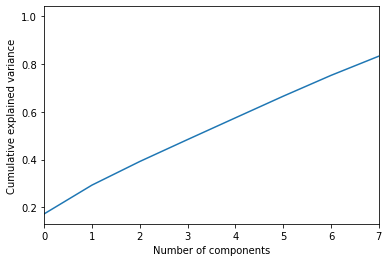

In [58]:
#Implementing PCA
from sklearn.decomposition import PCA
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,7,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [59]:
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,1.168149,-0.110204,-1.717875,-0.887672,-1.561640,1.170191,0.428760,1.961275,-0.518323,0.476907,-0.478264
1,-0.868319,0.532677,-0.321281,-0.080310,0.117956,-0.900703,-1.539965,0.439417,-0.070825,-0.136879,-0.110904
2,0.111634,-1.352203,-0.244588,-0.882520,0.906969,0.681999,-0.588747,-0.307366,0.193892,-0.194595,-0.219988
3,0.665732,-2.103717,1.589485,0.683554,-0.162010,-0.541979,0.155569,-0.525699,1.035308,0.215173,-0.162366
4,0.134104,-0.477237,0.255556,0.564454,-0.528343,-0.327656,-0.485545,-0.452123,-0.026374,-1.529348,1.649617


In [60]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
department,0.139739,-0.611771,-0.105185,0.186375,-0.031784,0.178468,0.010116,0.268481,-0.155485,-0.656524,-0.012864
region,-0.110856,0.044280,0.033933,-0.146513,-0.915884,0.244053,-0.004208,0.129855,0.215501,0.000064,0.037507
education,0.409535,0.132544,0.091056,0.059042,-0.192808,0.109384,0.184457,0.133747,-0.786965,0.251537,-0.138919
gender,-0.056310,-0.060754,0.628370,-0.235864,0.010335,0.102466,-0.635275,-0.244563,-0.210675,-0.155308,-0.012739
recruitment_channel,-0.009167,-0.010910,-0.079719,-0.614664,0.287016,0.686476,0.245716,0.014985,0.028721,0.022139,0.009320
no_of_trainings,-0.119767,-0.089934,0.677310,0.092979,0.133420,-0.041274,0.332283,0.567248,0.187361,0.150726,0.025775
age,0.637863,0.059041,0.091681,-0.000001,0.004412,0.012527,-0.031881,-0.044559,0.204938,-0.012339,0.732058
previous_year_rating,0.028079,0.442942,-0.247070,-0.171150,0.110205,-0.068284,-0.449385,0.683697,-0.028795,-0.160156,-0.001336
length_of_service,0.604316,0.055894,0.104944,-0.054385,-0.002280,-0.022875,-0.023653,-0.054249,0.409922,-0.068438,-0.664046
awards_won?,-0.039274,0.167108,-0.004257,0.673716,0.102371,0.637911,-0.239043,-0.006485,0.121649,0.161803,-0.032388


In [61]:
print(pca.explained_variance_ratio_.round(2)[:10])


[0.17 0.12 0.1  0.09 0.09 0.09 0.09 0.08 0.07 0.06]


For the PCA , some features are in line with the LDA feature reduction but from our obvious understanding. It didnt perform well

Challenging the Solution II

In [62]:
# Separating features and target variables for algorithm fitting


X = df1.iloc[:, :-1]
y = df1.iloc[:, -1]

In [63]:
feature_names = list(df1.columns)
feature_names.remove('is_promoted')

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=23)

In [65]:
forest = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=13, min_samples_split=15)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=15, n_estimators=300,
                       random_state=13)

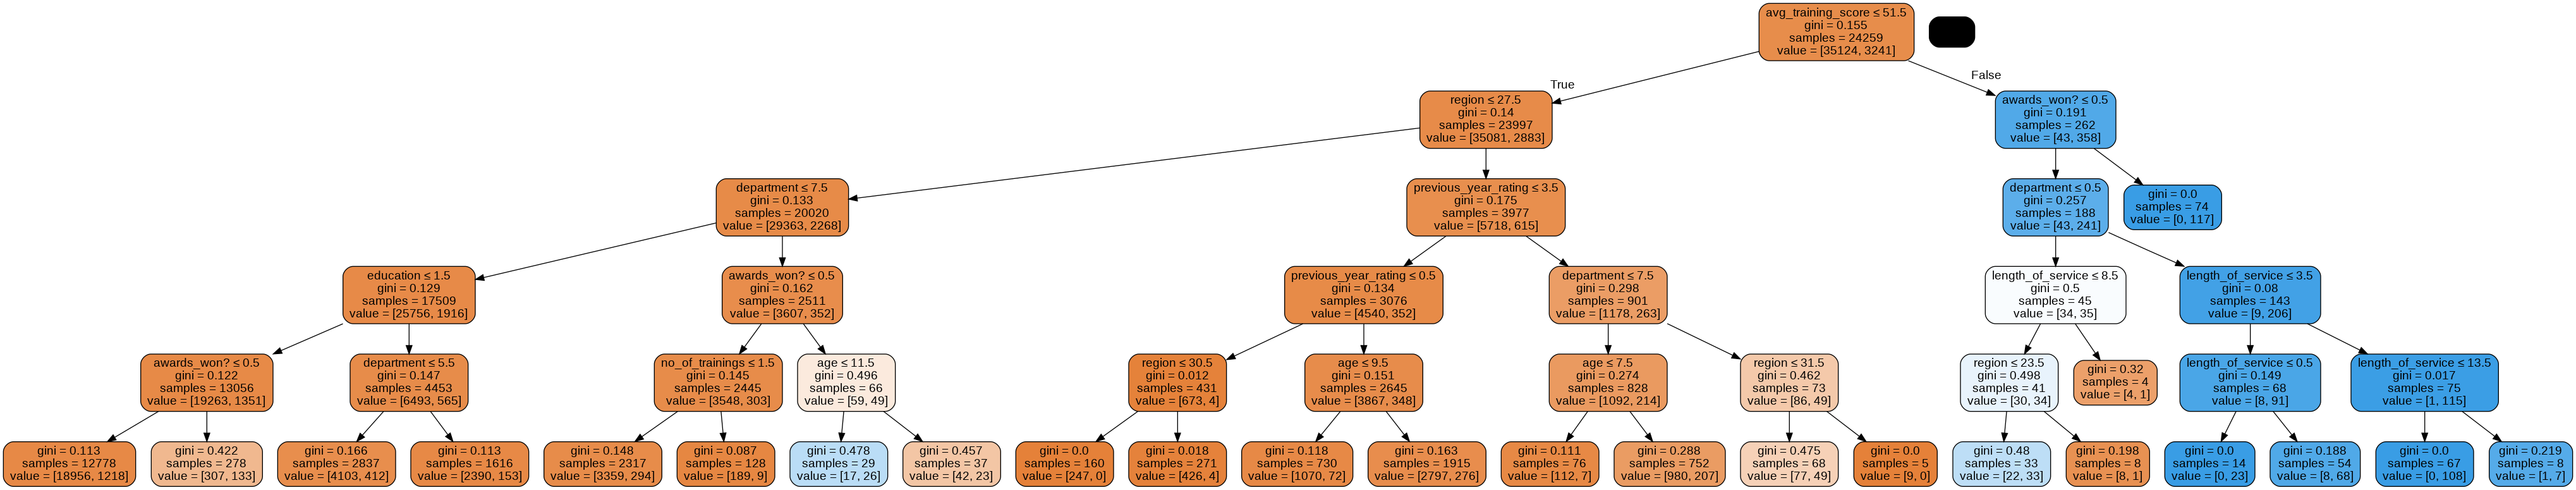

In [66]:
# visualize our a specific tree from the estimator
dot_data = StringIO()
tree = forest.estimators_[250]


export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Promotion_tree.png')
Image(graph.create_png())

In [67]:
# trying different parametters for model fitting

forest2 = RandomForestClassifier(n_estimators=300, criterion='entropy',
                                 min_samples_split=25, max_depth=3)

forest2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=25,
                       n_estimators=300)

In [68]:
# evaluating the model
print("General score: ", forest2.score(X_test, y_test))

c_score_f2 = cross_val_score(estimator=forest2,
                             X=X_train,
                             y=y_train,
                             scoring='accuracy',
                             cv=5)

print("Cross validated score: ", c_score_f2.mean())

General score:  0.9229459344401874
Cross validated score:  0.9231330639906163


In [69]:
f_importances = {}
forest2_coef = forest2.feature_importances_
for feat, coef in zip(feature_names, forest2_coef):
  f_importances[feat] = coef

pd.DataFrame.from_dict(f_importances, orient='index', columns=['Coefficients']).sort_values(by='Coefficients', ascending=False)

,Coefficients
avg_training_score,0.495485
awards_won?,0.230597
previous_year_rating,0.205996
department,0.029841
age,0.011233
education,0.008335
region,0.007886
no_of_trainings,0.005558
length_of_service,0.003047
gender,0.001775
